<a href="https://colab.research.google.com/github/enggisabrilla/Multilayer-Perceptron-MLP-/blob/main/Multilayer_Perceptron_(MLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Load Dataset

In [59]:
df = pd.read_csv('/content/student_habits_performance.csv')

In [60]:
df.shape

(1000, 16)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [62]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


In [63]:
df.replace({',': '.'}, regex=True, inplace=True)

In [64]:
float_cols = ['study_hours_per_day', 'social_media_hours', 'netflix_hours',
              'attendance_percentage', 'sleep_hours', 'exam_score']
df[float_cols] = df[float_cols].astype(float)

# Pra-pemrosesan

## Drop kolom ID

In [50]:
df.drop(columns=['student_id'], inplace=True)

In [65]:
num_features = ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
                'attendance_percentage', 'sleep_hours']
cat_features = ['gender', 'part_time_job', 'diet_quality', 'exercise_frequency',
                'parental_education_level', 'internet_quality', 'mental_health_rating',
                'extracurricular_participation']

## Target

In [66]:
y = df['exam_score']
X = df.drop(columns='exam_score')

## Pra-pemrosesan menggunakan pipeline

In [54]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ])

#  Split Data & Transformasi

## Split data

In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

## Transformasi data

In [68]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Membangun dan Melatih Model

In [69]:
model = Sequential()
model.add(Dense(128, input_dim=X_train_transformed.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))  # Output regresi

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

history = model.fit(X_train_transformed, y_train,
                    validation_data=(X_test_transformed, y_test),
                    epochs=100, batch_size=32, verbose=1)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 5163.4956 - mae: 69.8985 - val_loss: 4873.9697 - val_mae: 68.0005
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4648.4351 - mae: 66.2614 - val_loss: 4728.4155 - val_mae: 66.9928
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4278.0767 - mae: 63.7738 - val_loss: 4450.2573 - val_mae: 65.0717
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3655.1096 - mae: 59.0383 - val_loss: 3928.8406 - val_mae: 61.3510
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2943.6436 - mae: 52.7583 - val_loss: 3028.8630 - val_mae: 54.0662
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1849.7393 - mae: 40.3578 - val_loss: 1929.3551 - val_mae: 42.6418
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1220.7587 - mae: 31.3224 - val_loss: 1017.5336 - val_mae: 29.8941
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 877.1185 - mae: 25.6638 - val_loss: 437.5894 - val_mae: 18.2606
Epoch 9/100
2

# Evaluasi Model

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
MAE  : 5.20
RMSE : 6.41
R²    : 0.8400


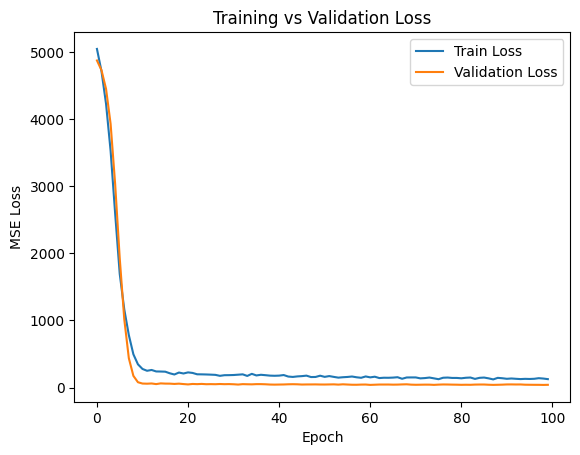

In [70]:
# Prediksi
y_pred = model.predict(X_test_transformed).ravel()

# Evaluasi
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²    : {r2:.4f}")

# Visualisasi loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

**1. Grafik: Training vs Validation Loss**

Penjelasan:
* Sumbu X (Epoch): menunjukkan jumlah iterasi pelatihan (dari 0 hingga 100 epoch).

* Sumbu Y (MSE Loss): menunjukkan nilai loss Mean Squared Error (MSE), yaitu rata-rata kuadrat dari selisih prediksi dengan nilai aktual.

* Garis Biru (Train Loss): menunjukkan seberapa baik model belajar dari data pelatihan.

* Garis Oranye (Validation Loss): menunjukkan seberapa baik model bekerja pada data yang belum dilihat (data pengujian/validasi).

**Interpretasi:**
* Di epoch awal (0–15), loss turun drastis → ini normal karena model sedang belajar mengenali pola dasar dari data.

* Setelah epoch ke-15, baik training loss maupun validation loss mendatar dan stabil di nilai rendah → tidak terjadi overfitting, karena:
 - Validation loss tetap rendah dan tidak naik
 - Performa model pada data baru tetap baik, menandakan generalisasi bagus.

**2. Evaluasi Akhir Model**
Nilai Evaluasi:
* MAE (Mean Absolute Error)	5.52	: Rata-rata kesalahan prediksi hanya 5.52 poin dari skor ujian (0–100), cukup rendah.
* RMSE (Root Mean Squared Error)	6.70	: Kesalahan prediksi rata-rata yang memperbesar penalti untuk error besar. Masih dalam batas wajar.
* R² Score (Koefisien Determinasi)	0.8247	: Artinya 82,47% variasi skor ujian dapat dijelaskan oleh variabel gaya hidup yang digunakan. Ini adalah performa sangat baik untuk model regresi.

**Kesimpulan**

1. Model MLP (Multilayer Perceptron) Anda berhasil melakukan prediksi skor ujian berdasarkan data gaya hidup dengan sangat baik.
2. Tidak ada tanda overfitting atau underfitting.

3. Model mampu memahami korelasi kompleks antar fitur (seperti jam belajar, tidur, diet, kesehatan mental, dsb).

4. Dengan R² = 82%, model ini cukup kuat untuk aplikasi prediktif dan bisa dijadikan dasar untuk pengambilan keputusan atau analisis lebih lanjut.